<a href="https://colab.research.google.com/github/VDeshmukhCemtrex/Machine-Learning-Algorithms/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()

In [3]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

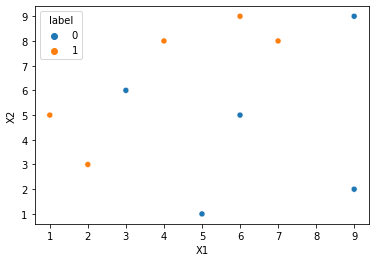

In [6]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [7]:
df['weights']=1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [12]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

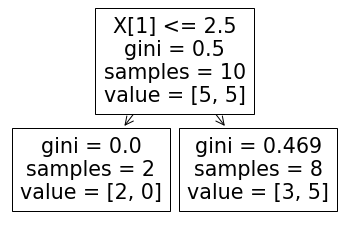

In [13]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


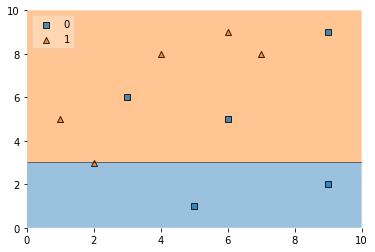

In [14]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [15]:
df['y_pred']=dt1.predict(X)

In [16]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [40]:
def cal_model_weight(error):
  return 0.5*np.log((1-(error+0.00001))/(error+0.00001))

In [18]:
a1=cal_model_weight(0.3)
a1

0.42364893019360184

In [19]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [20]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df['updated_weights'].sum()

0.9165153319682015

In [22]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df['normalized_weights'].sum()

1.0

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [29]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [30]:
def create_new_dataset(df):
  indices=[]
  for i in range(df.shape[0]):
    a=np.random.random()
    print(a)
    for index,row in df.iterrows():
      if row['cumsum_upper']>a and a>row['cumsum_lower']:
        indices.append(index)
  return indices

In [31]:
index_values = create_new_dataset(df)
index_values

0.7724677020948066
0.26181886941336374
0.4394869822018933
0.40391841821068386
0.07592410847362896
0.06564397026311763
0.6385896545422074
0.6363082659341983
0.8061679965184961
0.9048346496928702


[8, 2, 4, 4, 1, 0, 6, 6, 8, 8]

In [32]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
8,9,9,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1


In [36]:
dt2=DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

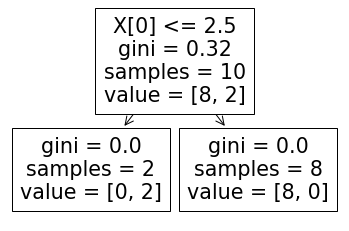

In [35]:
plot_tree(dt2)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


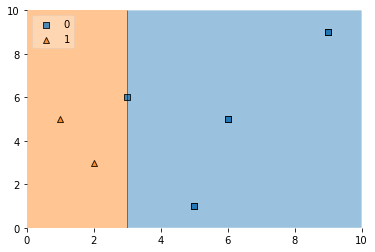

In [37]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [38]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
1,2,3,1,0.1,1
0,1,5,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0


In [41]:
a2=cal_model_weight(0)
a2

5.756457732460114

In [49]:
print(a1,a2)

0.42364893019360184 5.756457732460114


In [56]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [57]:
dt2.predict(query)

array([0])

In [59]:
a1*1+a2*1

6.180106662653716

In [60]:
np.sign(6.18)

1.0

In [61]:
query = np.array([3,6]).reshape(1,2)
dt1.predict(query)

array([1])

In [62]:
dt2.predict(query)

array([0])

In [64]:
a1*1+a2*0

0.42364893019360184

In [65]:
np.sign(0.423)

1.0